In [23]:
import pandas as pd

In [24]:
# Read the CSV as a single column
df = pd.read_csv("scheduling_results_4_classes_cleaned.csv", header=None)

# Split into multiple columns using the semicolon as a delimiter
df = df[0].str.split(';', expand=True)

In [25]:
# Assign proper column names
df.columns = ['instance', 'jobs', 'machines', 'strategy', 'tw', 'compression', 
              'overlapping', 'interrupted_calls', 'makespan', 'gap_to_opt_percent', 'opt_class']

# Verify the DataFrame
print(df.head())

  instance jobs machines strategy tw compression overlapping  \
0     TA51   50       15    EST-M  2         Yes          No   
1     TA52   50       15    EST-M  2         Yes          No   
2     TA53   50       15    EST-M  2         Yes          No   
3     TA54   50       15    EST-M  2         Yes          No   
4     TA55   50       15    EST-M  2         Yes          No   

  interrupted_calls makespan gap_to_opt_percent opt_class  
0                 2     3070                 11         1  
1                 2     3128                 13         1  
2                 2     2956                  9         1  
3                 2     3039                  7         1  
4                 2     2998                 12         1  


In [26]:
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [31]:
# Convert numeric columns to appropriate types
numeric_cols = ['jobs', 'machines', 'tw', 'interrupted_calls', 'makespan', 'gap_to_opt_percent']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Encode categorical variables (e.g., 'strategy', 'compression', 'overlapping')
label_encoder = LabelEncoder()
categorical_cols = ['strategy', 'compression', 'overlapping', 'opt_class']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


# Define the features (X) and the target variable (y)
x = df[['jobs', 'machines', 'strategy', 'tw', 'compression', 'overlapping']]
y = df['opt_class']  # Target variable for classification

In [32]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
# Train the Classification Decision Tree
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)

# Perform 10-fold cross-validation on the entire dataset before fitting
cv_scores = cross_val_score(decision_tree, x, y, cv=10, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy from Cross-Validation:", cv_scores.mean())

decision_tree.fit(x_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Cross-Validation Scores: [0.48504274 0.78846154 0.17307692 0.53418803 0.53418803 0.53846154
 0.30555556 0.26282051 0.49358974 0.54487179]
Mean Accuracy from Cross-Validation: 0.466025641025641
Accuracy: 0.7350427350427351

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       448
           1       0.66      0.69      0.67       349
           2       0.54      0.18      0.27       112
           3       1.00      0.59      0.74        27

    accuracy                           0.74       936
   macro avg       0.75      0.59      0.63       936
weighted avg       0.72      0.74      0.71       936



C:\Users\Mohammed El-Kholany\AppData\Local\Temp\ipykernel_7016\3154872225.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')


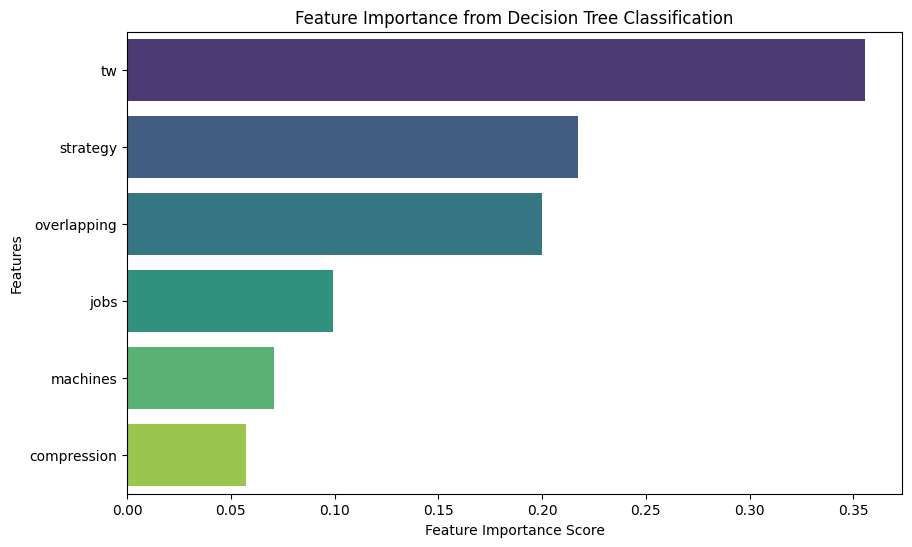

In [34]:
# Feature Importance Analysis
feature_importances = decision_tree.feature_importances_
features = x.columns
# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance from Decision Tree Classification")
plt.show()